In [47]:
ratings = pd.read_csv("Ratings.csv")
books = pd.read_csv("Books.csv")

<ipython-input-47-b20246700688>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [3]:
import pandas as pd

In [5]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 31.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 39.7MB/s]


Посмотрим на таблицу `Ratings`.

In [6]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

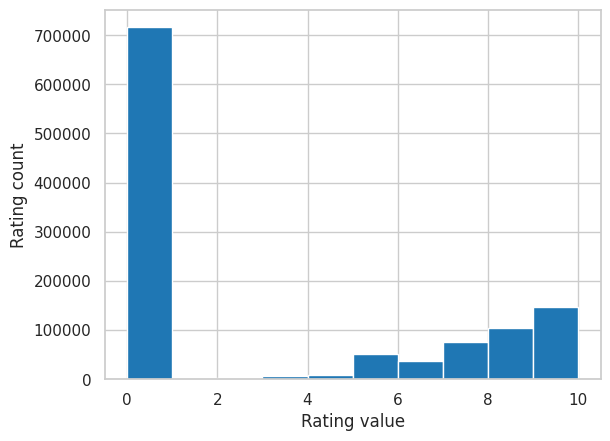

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [9]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-9-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

# Обработка данных

  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.



In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [10]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием.

Сначала двигаем, потом извлекаем автора.

In [48]:
selected_rows = [209538, 220731, 221678]
selected_cols = books.columns[2:]

for idx in selected_rows:
    values = books.loc[idx, selected_cols].to_list()
    shifted_values = [values[-1]] + values[:-1]
    books.loc[idx, selected_cols] = shifted_values

In [49]:
def extract_title_and_author(book_title):
    parts = book_title.split(";")
    if len(parts) == 2:
        title = parts[0].strip('\"')
        author = parts[1].strip('"')
        return title, author
    return book_title,

for idx in selected_rows:
    book_title = books.loc[idx, "Book-Title"]
    title, author = extract_title_and_author(book_title)
    books.loc[idx, "Book-Title"] = title
    books.loc[idx, "Book-Author"] = author

books.loc[selected_rows]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [27]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
1376,1
1926,1
2024,1
1938,1
1897,1
2020,1
2011,1
1378,1


In [50]:
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype("int")
books = books[books["Year-Of-Publication"] <= 2025].dropna()

  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.

In [20]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [21]:
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [29]:
books = books.dropna()
books = books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'])

In [51]:
df_books = books.copy()
df_ratings = ratings.copy()

 3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.

In [52]:
ratings = ratings[ratings["Book-Rating"] != 0]

  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).

In [53]:
df_books = df_books[df_books["ISBN"].isin(ratings["ISBN"])]
ratings = ratings.groupby("User-ID").filter(lambda x: len(x) > 1)
ratings = ratings.groupby("ISBN").filter(lambda x: len(x) > 1)

# Обучить SVD

In [33]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=968ab0be84ec5bad85b7b67a47ab058c11df647d33aa90d14beaa8d520ac3377
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [54]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

trainset, testset = train_test_split(data, test_size=0.2)
svd = SVD()
svd.fit(trainset)

predictions = svd.test(testset)
mae = accuracy.mae(predictions)

if mae < 1.3:
    import pickle
    with open("svd_model.pkl", "wb") as f:
        pickle.dump(svd, f)
    print("Модель успешно сохранена!")
else:
    print("MAE больше 1.3, модель не сохранена.")

MAE:  1.2482
Модель успешно сохранена!


# SGDRegressor

Необходимо научить линейную регрессию SGDRegressor предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import pickle

average_ratings = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()
average_ratings.rename(columns={"Book-Rating": "Average-Rating"}, inplace=True)
data_linreg = pd.merge(books, average_ratings, on="ISBN", how="left").dropna(subset=["Average-Rating"])

X = data_linreg[["Book-Title", "Book-Author", "Publisher", "Year-Of-Publication"]]
y = data_linreg["Average-Rating"]

# Создание трансформеров для обработки данных
preprocessor = ColumnTransformer(transformers=[
    ("title", TfidfVectorizer(stop_words='english', max_features=5000), "Book-Title"),
    ("author", OneHotEncoder(handle_unknown='ignore'), ["Book-Author"]),
    ("publisher", OneHotEncoder(handle_unknown='ignore'), ["Publisher"]),
    ("year", StandardScaler(), ["Year-Of-Publication"])
])

# Создаем пайплайн с линейной регрессией
model_linreg = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", SGDRegressor(random_state=42, max_iter=1000, tol=1e-3))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model_linreg.fit(X_train, y_train)
y_pred = model_linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE модели: {mae}")

if mae < 1.5:
    with open("linreg_model.pkl", "wb") as file:
        pickle.dump(model_linreg, file)
    print("Модель успешно сохранена!")
else:
    print("MAE больше 1.5, модель не сохранена.")


MAE модели: 0.9464906278434098
Модель успешно сохранена!


# Рекомендация для пользователя

В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.

Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

In [61]:
import pandas as pd
import pickle
from surprise import Dataset, Reader, SVD

# 1. Находим нужного пользователя
user_with_most_zeros = (
    df_ratings[df_ratings["Book-Rating"] == 0]
    .groupby("User-ID")["Book-Rating"]
    .count()
    .idxmax()
)

# 2. Делаем предсказание SVD для книг, которым он "поставил" 0
user_zero_ratings =df_ratings[
    (df_ratings["User-ID"] == user_with_most_zeros) & (df_ratings["Book-Rating"] == 0)
]

with open("svd_model.pkl", "rb") as svd_file:
    svd_model = pickle.load(svd_file)

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

books_to_predict = user_zero_ratings["ISBN"].unique()
predicted_ratings_svd = [
    (isbn, svd_model.predict(user_with_most_zeros, isbn).est)
    for isbn in books_to_predict
]

#  3. Берем те книги, для которых предсказали рейтинг не ниже 8.
high_rated_books = [isbn for isbn, rating in predicted_ratings_svd if rating >= 8]

# 4. Делаем предсказание LinReg для этих же книг
with open("linreg_model.pkl", "rb") as linreg_file:
    linreg_model = pickle.load(linreg_file)

high_rated_books_data = df_books[df_books["ISBN"].isin(high_rated_books)]
X_high_rated = high_rated_books_data[
    ["Book-Title", "Book-Author", "Publisher", "Year-Of-Publication"]
]
predicted_ratings_linreg = linreg_model.predict(X_high_rated)

# 5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели
recommendations = list(
    zip(high_rated_books_data["Book-Title"], predicted_ratings_linreg)
)
recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

# 6. В конце файла комментарием записываем полученную рекомендацию
print("Рекомендации для пользователя:")
for title, rating in recommendations:
    print(f"{title}: {rating:.2f}")

Рекомендации для пользователя:
The Lion, the Witch and the Wardrobe (Full-Color Collector's Edition): 9.18
Harry Potter and the Chamber of Secrets (Book 2): 8.90
Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1): 8.64
Yukon Ho!: 8.60
Are You There God?  It's Me, Margaret: 8.55
Charlotte's Web (Trophy Newbery): 8.47
The Magician's Nephew (Narnia): 8.46
The Hobbit : The Enchanting Prelude to The Lord of the Rings: 8.43
A Wrinkle In Time: 8.38
Little House in the Big Woods: 8.34
The Perfect Storm : A True Story of Men Against the Sea: 8.23
The Magician's Nephew (rack) (Narnia): 8.23
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)): 8.16
On the Banks of Plum Creek: 8.11
A Wrinkle in Time: 8.05
A Prayer for Owen Meany: 8.05
Master and Commander (Aubrey-Maturin (Paperback)): 8.02
Bridge to Terabithia: 7.97
The Color Purple: 7.96
The Giver (21st Century Reference): 7.95
The Bean Trees: 7.94
The Concrete Blonde (A Harry Bosch Novel): 7.89
I Know This Much Is Tru

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**